## Brownian Motion Simulation - Diffusion

**February 4, 2024**  
**Jake Bobowski**

A toy model to simulate the diffusion of partlicles that are injected into the centre of container filled with a fluid.  Like using an eyedropper to put a drop of food colouring in the middle of a jar filled with water.  The simulation works as follows:

 - $N$ particles are placed at the centre of a 2-D chamber ($1\rm\ unit \times 1\rm\ unit$ in size).
 - Binomial distributions are used to determine if each particle:
     - steps left or right
     - steps up or down
 - There is an equal probability that a particle steps left or right.
 - There is an equal probability that a particle steps up or down.
 - Normal distributions are used determine the size of the horizontal and vertical steps.
 - The particle positions are updated according to the step sizes and directions.
     - If an x-coordinate becomes negative, its position is changed to $1 + x$.  That is particles that cross the left boundary reappear near the right boundary.
     - If an x-coordinate becomes greater than $1$, its position is changed to $x - 1$.  That is particles that cross the right boundary reappear near the left boundary.
     - If a y-coordinate becomes negative, its position is changed to $1 + y$.  That is, particles that cross the bottom boundary reappear near the top boundary.
     - If a y-coordinate becomes greater than $1$, its position is changed to $y - 1$.  That is, particles that cross the top boundary reappear near the bottom boundary.
 - The initial positions of the $N$ particles are plotted as cyan points.  In this simulation, this corresponds to a single point at $(x, y) = (0.5, 0.5)$.
 - The positions of the particles are updated dynamically as the loop executes.  The updated positions are plotted in orange.
 - With each iteration of the loop, the particle number versus height in the chamber is tracked.
 - The counts versus height is plotted.  This plot is also updated dynamically.
 - Initially, the particles are all at the centre of the cell, so the plot of the counts versus height is sharply peaked at $h = 0.5$.
 - Eventually, a new equilibrium is reach in which the particle distribution becomes uninform such that the count versus height plot appears flat.
 
The block of code below takes approximately 2.5 minutes to run.
     

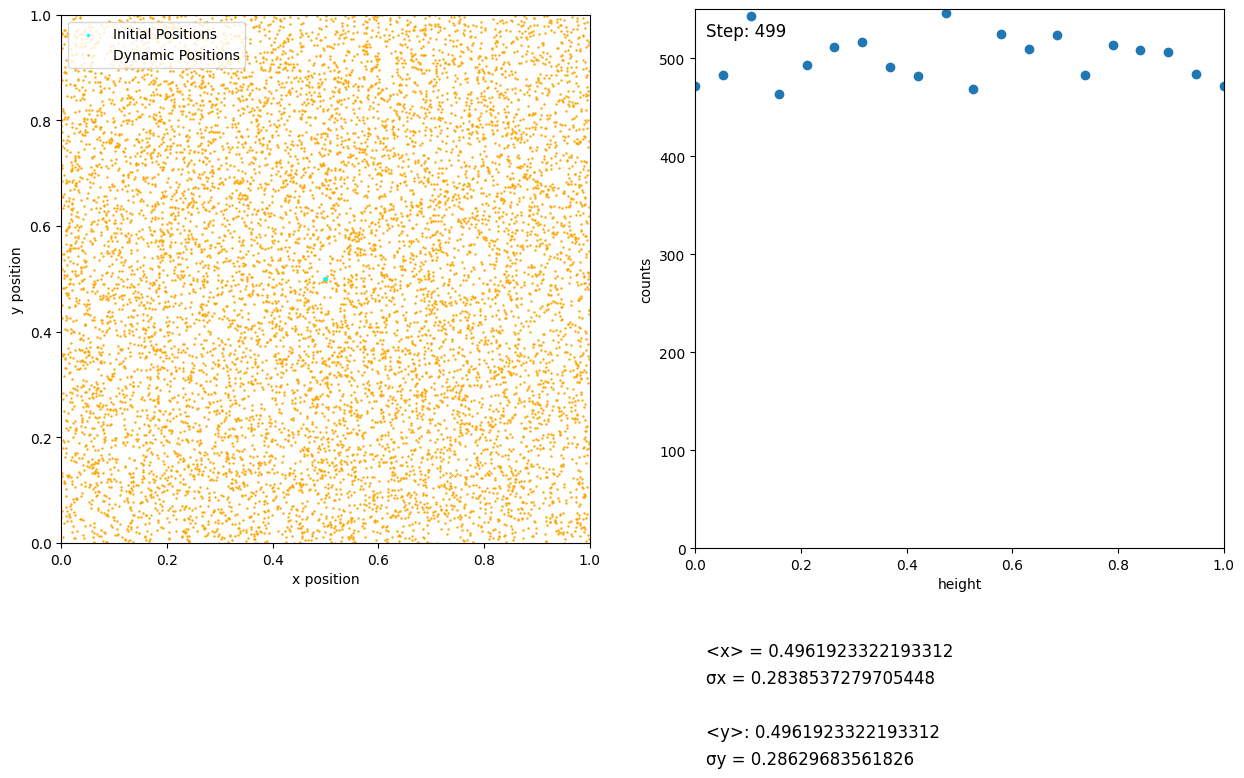

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, clear_output, Markdown
import time
import warnings
import jupyprint as jp

with warnings.catch_warnings():
    warnings.simplefilter("ignore") # Suppress warning messages.
    
    N = int(1e4) # Number of particles
    num_steps = int(5e2) # Number of interations/steps

    x = np.ones(N)*0.5 # Step the initial coordinates of the N particles to be exactly in the centre of the 1 x 1 cell (x, y) = (0.5, 0.5).
    y = np.ones(N)*0.5

    x_initial = x.copy() # Copy in the initial coordinates.
    y_initial = y.copy()

    fig, (ax, ax1) = plt.subplots(1, 2, figsize=(15, 7)) # Set up the plots to be dynamically updated while the loop runs.
    ax.set_aspect('equal')

    h = np.linspace(0, 1, 20) # We will determine the particle density as a function of the height h from the bottom of the y-range.
    bin_edges = np.linspace(0, 1, 21) # We will count the particles between 0 < y < 0.05, 0.05 < y < 0.1, ..., 0.95 < y < 1.

    for step in range(num_steps):
        dx = np.random.binomial(1, 0.5, N) # For each step, the probabilty of a particle scattering left or right is the same. 
        dy = np.random.binomial(1, 0.5, N) # For each step, the probabilty of a particle scattering up or down is the same. 
        
        x_step = abs(np.random.normal(0, 1, N) * 2e-2) # Randomize the sizes of the steps in the x and y directions for each particle and each iteration of the loop.
        y_step = abs(np.random.normal(0, 1, N) * 2e-2)

        x += np.where(dx == 0, -x_step, x_step) # Update the x coordinates. 
        x = np.where(x < 0, x + 1, x) # If x < 0, add 1.  A particle that moves past the left boundary will appear near the right boundary.
        x = np.where(x > 1, x - 1, x) # If x > 1, subtract 1.  A particle that moves past the right boundary will appear near the left boundary.

        y += np.where(dy == 0, -y_step, y_step) # Update the y coordinates.        
        y = np.where(y < 0, y + 1, y) # If y < 0, add 1.  A particle that moves past the bottom boundary will appear near the top boundary.
        y = np.where(y > 1, y - 1, y) # If x > 1, subtract 1.  A particle that moves past the top boundary will appear near the bottom boundary.

        ax.clear()
        ax.scatter(x_initial, y_initial, s = 2, color='cyan', label='Initial Positions') # Plot the initial positions of the particles.
        ax.scatter(x, y, s=0.5, color='orange', label='Dynamic Positions') # Dynamically plot the new positions. 
        ax.set_xlim(0, 1)
        ax.set_ylim(0, 1)
        ax.legend(loc='upper left')
        ax.set_xlabel("x position")
        ax.set_ylabel("y position")

        display(fig)
        clear_output(wait=True)
        time.sleep(1e-4)

        count, _ = np.histogram(y, bins=bin_edges) # Determine the particle count has a function of the height h.
        
        ax1.clear()
        ax1.scatter(h, count) # Plot the particle count as a function of h.
        ax1.set_xlim(0, 1)
        ax1.set_ylim(0, None)  # Set the minimum y-range to be zero
        ax1.annotate(f'Step: {step}', xy=(0.02, 0.95), xycoords='axes fraction', fontsize=12, color='black')
        ax1.set_xlabel("height")
        ax1.set_ylabel("counts")
        
        x_bar = np.average(x)
        sigma_x = np.std(x)
        y_bar = np.average(y)
        sigma_y = np.std(y)
        ax1.annotate(f'<x> = {x_bar}', xy=(0.02, -0.2), xycoords='axes fraction', fontsize=12, color='black')
        ax1.annotate(f'σx = {sigma_x}', xy=(0.02, -0.25), xycoords='axes fraction', fontsize=12, color='black')
        ax1.annotate(f'<y>: {x_bar}', xy=(0.02, -0.35), xycoords='axes fraction', fontsize=12, color='black')
        ax1.annotate(f'σy = {sigma_y}', xy=(0.02, -0.4), xycoords='axes fraction', fontsize=12, color='black')